In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Load the Dataset

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/My Drive/ABC_sports data.csv')
#df.head()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ABC_Sports.csv to ABC_Sports.csv


In [ ]:
df_base = pd.read_csv('ABC_Sports.csv')
df = df_base.copy()
df.head()

,opt_ID,opt_name_data,opt_desc_data,opt_name_size,opt_desc_size,client_class,id_client,segment,duration,opt_class,...,business_entity,client_location,competition_type,alliances,quarter,mergers,stage,win_prob,total_current_rev,aai_label
0,10777400,NaN,NaN,2,40,Très haute,0,B,Moins de 100,Très Importante,...,F,France,Competitive,non_data_all,FY20Q3,non_data_acq,3B,90,349988,0
1,11003779,NaN,NaN,4,37,Très haute,0,B,Moins de 100,Moyenne,...,E,France,Sole Sourced,non_data_all,FY21Q1,other,0A,30,9790,0
2,11049284,NaN,NaN,8,5,Très haute,0,B,Moins de 100,Faible,...,F,France,Sole Sourced,non_data_all,FY20Q3,other,3B,70,728,0
3,11067178,NaN,NaN,8,11,Très haute,0,B,Moins de 100,Faible,...,F,France,Sole Sourced,non_data_all,FY20Q1,other,3B,100,696,0
4,11046646,NaN,NaN,6,6,Très haute,0,B,Moins de 100,Faible,...,F,France,Sole Sourced,other,FY20Q2,other,3B,100,634,0


## Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   opt_ID             3242 non-null   int64 
 1   opt_name_data      226 non-null    object
 2   opt_desc_data      343 non-null    object
 3   opt_name_size      3242 non-null   int64 
 4   opt_desc_size      3242 non-null   int64 
 5   client_class       3242 non-null   object
 6   id_client          3242 non-null   object
 7   segment            3242 non-null   object
 8   duration           3242 non-null   object
 9   opt_class          3242 non-null   object
 10  sales_capture      3242 non-null   object
 11  count_aai          3242 non-null   int64 
 12  pricing_struct     3242 non-null   object
 13  business_entity    3242 non-null   object
 14  client_location    3242 non-null   object
 15  competition_type   3242 non-null   object
 16  alliances          3242 non-null   object


In [ ]:
df.describe()

,opt_ID,opt_name_size,opt_desc_size,count_aai,win_prob,total_current_rev,aai_label
count,3.242000e+03,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,1.102751e+07,4.482727,16.724553,6.046268,60.461444,3011.888341,0.293029
std,4.156137e+05,1.532486,14.250904,13.030724,35.433123,12572.688893,0.455222
min,5.571730e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.101940e+07,3.000000,5.000000,0.000000,30.000000,148.000000,0.000000
50%,1.105871e+07,4.000000,11.000000,2.000000,70.000000,652.000000,0.000000
75%,1.109197e+07,5.000000,29.000000,5.000000,100.000000,1615.000000,1.000000
max,1.112891e+07,9.000000,51.000000,59.000000,100.000000,349988.000000,1.000000


In [ ]:
client_count = df["id_client"].value_counts()
print(client_count)

id_client
35     158
39     156
8      120
15     100
0       92
      ... 
352      1
150      1
171      1
265      1
393      1
Name: count, Length: 396, dtype: int64


In [ ]:
salesman_count = df["sales_capture"].value_counts()
print(salesman_count)

sales_capture
blank           170
gabriel.p        95
margaux.b        51
édouard.s        49
audrey.m         49
               ... 
denise.h          1
isabelle.b        1
daisy.j           1
noël.c            1
marguerite.v      1
Name: count, Length: 582, dtype: int64


In [ ]:
client_count = df["client_class"].value_counts()
print(client_count)

client_class
Très haute    1256
Haute          860
Moyenne        568
Basse          544
Inconnue        14
Name: count, dtype: int64


In [ ]:
label_count = df["aai_label"].value_counts()
print(label_count)

aai_label
0    2292
1     950
Name: count, dtype: int64


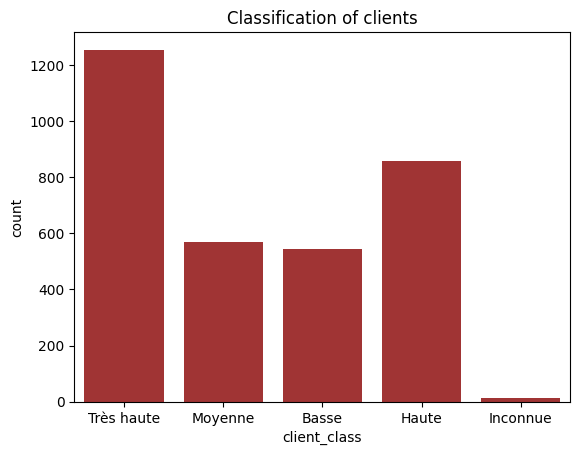

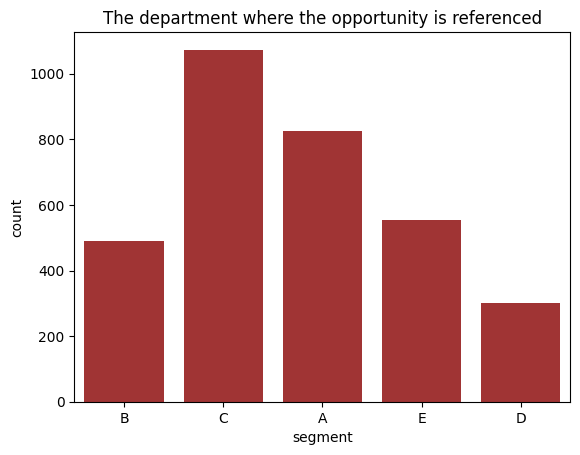

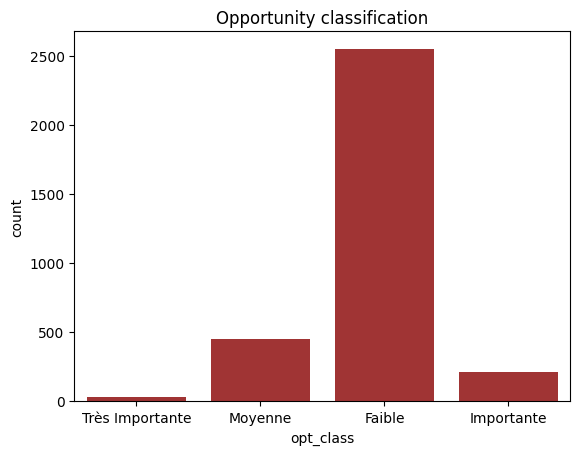

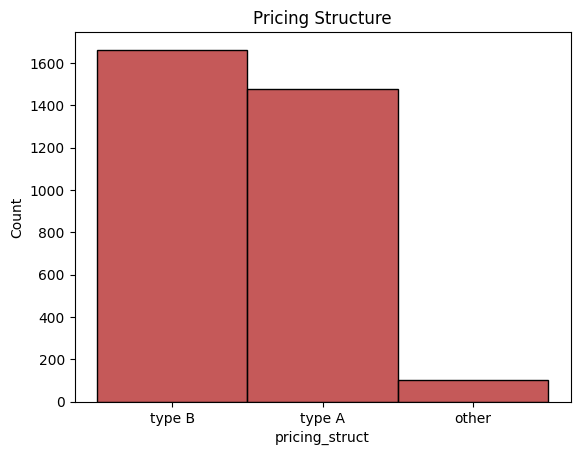

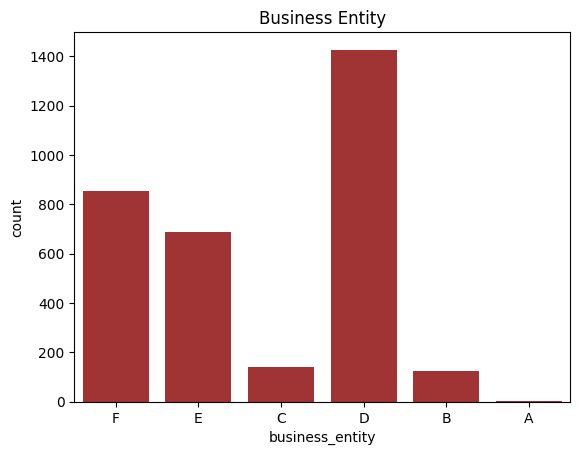

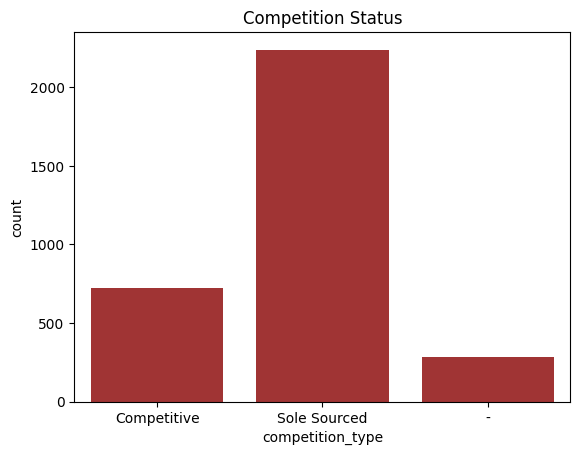

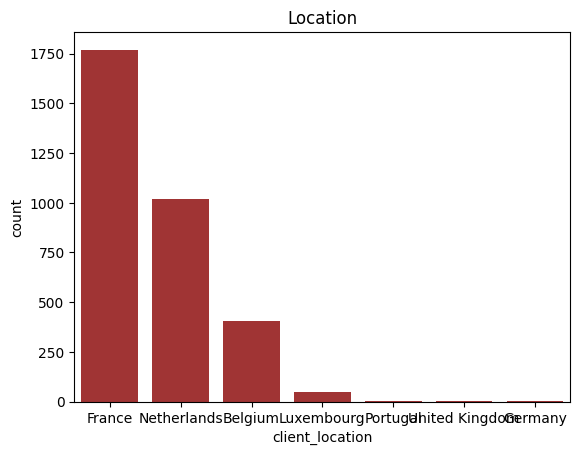

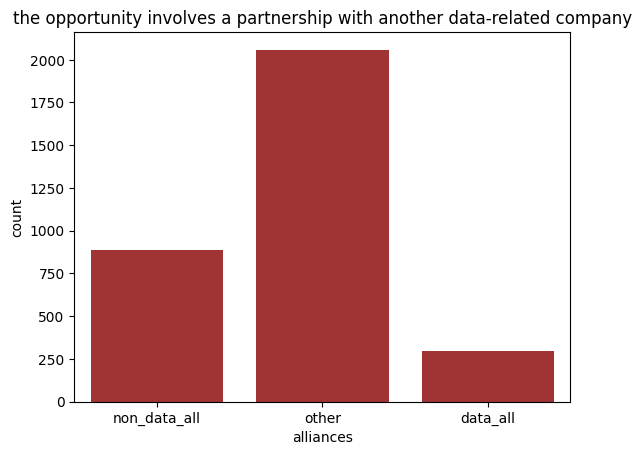

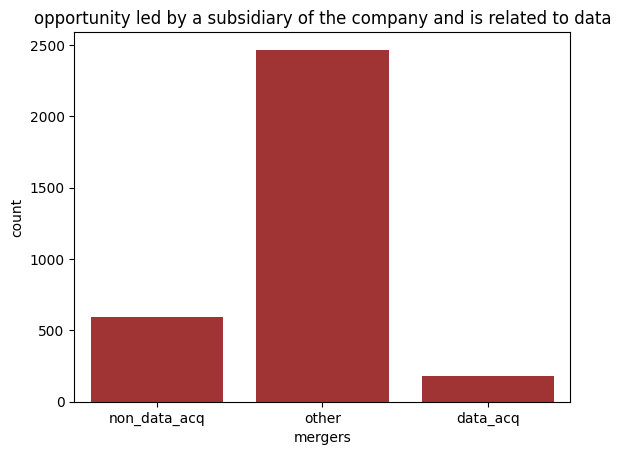

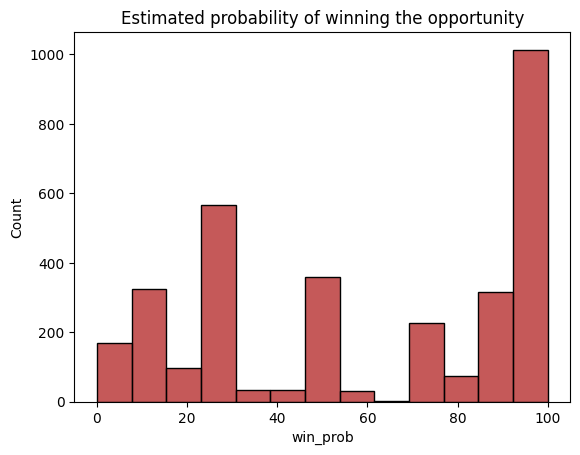

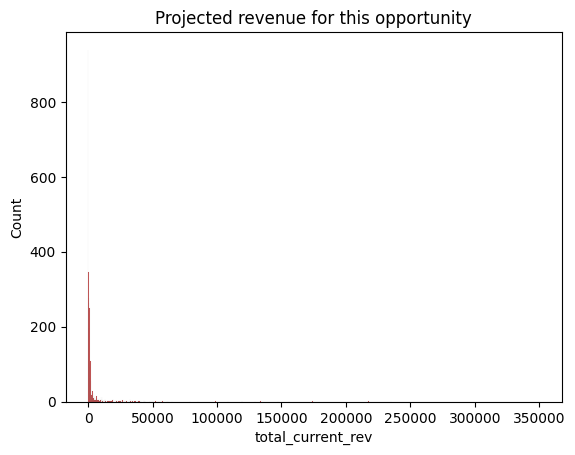

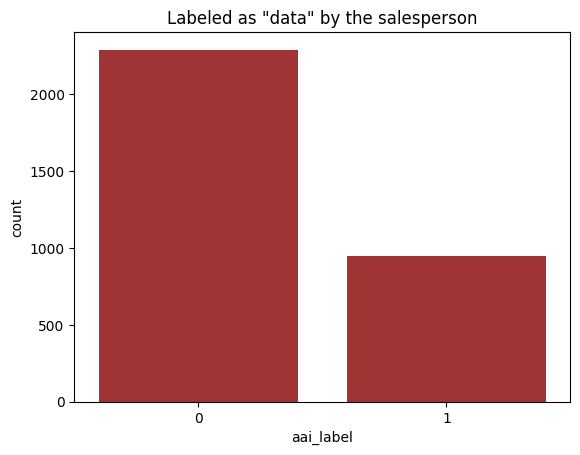

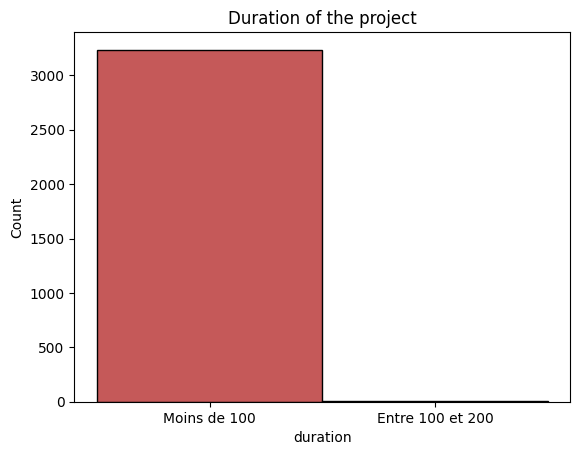

In [ ]:


sns.countplot(x='client_class', data=df, color='firebrick')
plt.title('Classification of clients')
plt.show()


sns.countplot(x='segment', data=df, color='firebrick')
plt.title('The department where the opportunity is referenced')
plt.show()

sns.countplot(x='opt_class', data=df, color='firebrick')
plt.title('Opportunity classification')
plt.show()



sns.histplot(x='pricing_struct', data=df, color='firebrick')
plt.title('Pricing Structure')
plt.show()

sns.countplot(x='business_entity', data=df, color='firebrick')
plt.title('Business Entity')
plt.show()

sns.countplot(x='competition_type', data=df, color='firebrick')
plt.title('Competition Status')
plt.show()

sns.countplot(x='client_location', data=df, color='firebrick')
plt.title('Location')
plt.show()

sns.countplot(x='alliances', data=df, color='firebrick')
plt.title('the opportunity involves a partnership with another data-related company')
plt.show()

sns.countplot(x='mergers', data=df, color='firebrick')
plt.title('opportunity led by a subsidiary of the company and is related to data')
plt.show()



sns.histplot(x='win_prob', data=df, color='firebrick')
plt.title('Estimated probability of winning the opportunity')
plt.show()



sns.histplot(x='total_current_rev', data=df, color='firebrick')
plt.title('Projected revenue for this opportunity')
plt.show()

sns.countplot(x='aai_label', data=df, color='firebrick')
plt.title('Labeled as "data" by the salesperson')
plt.show()

sns.histplot(x='duration', data=df, color='firebrick')
plt.title('Duration of the project')
plt.show()

### NA count : Data vs non-data related Opportunities


In [ ]:
df.isna().sum()
df[df['aai_label'] == 1].isna().sum()


,0
opt_ID,0
opt_name_data,829
opt_desc_data,784
opt_name_size,0
opt_desc_size,0
client_class,0
id_client,0
segment,0
duration,0
opt_class,0


In [ ]:
df[df['aai_label'] == 0].isna().sum()

,0
opt_ID,0
opt_name_data,2187
opt_desc_data,2115
opt_name_size,0
opt_desc_size,0
client_class,0
id_client,0
segment,0
duration,0
opt_class,0


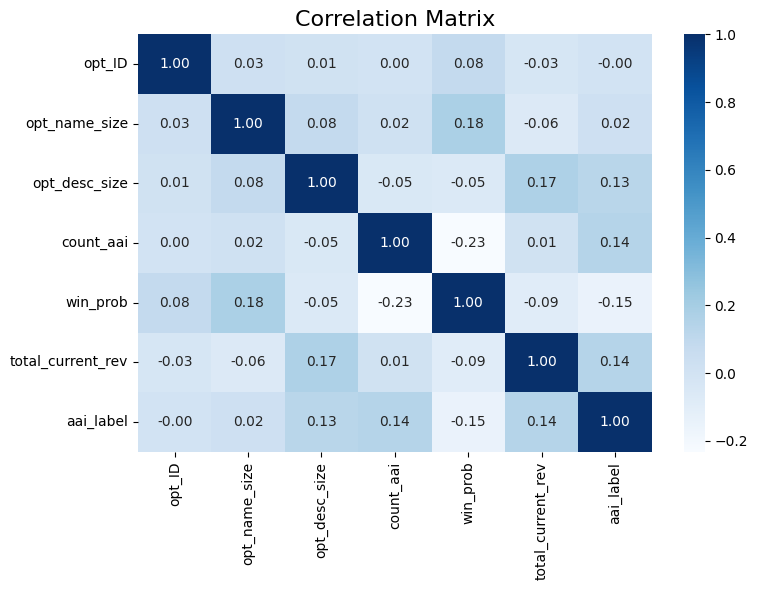

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
corr_matrix

custom_palette = sns.diverging_palette(220, 10, as_cmap=True)  # Customize the pallete
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()



### Outliers in Total Revenue --> Delete


In [ ]:
df['total_current_rev'].describe()
df = df[(df['total_current_rev'] >= 0) & (df['total_current_rev'] <= 5000)] # Delete potential outliers

## Data Cleaning and Preprocessing

In [ ]:
df.drop(columns=['opt_name_data', 'opt_desc_data', 'opt_name_size', 'opt_desc_size' ], inplace=True) # Drop variables, I believe are not important + they have a lot of NAs

<ipython-input-16-37676cd6dc48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['opt_name_data', 'opt_desc_data', 'opt_name_size', 'opt_desc_size' ], inplace=True) # Drop variables, I believe are not important + they have a lot of NAs


## 5. Feature Scaling and Splitting Data

### Encode Categorical Variables

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

le = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() == 2:
      df[col] = le.fit_transform(df[col])
    else:
      df = pd.get_dummies(df, columns=[col], drop_first=True)

### Feature Scaling

In [ ]:
scaler = StandardScaler()
numerical_cols = ['total_current_rev', 'win_prob', 'count_aai']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
X = df.drop(['aai_label', 'opt_ID'], axis=1)
y = df['aai_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Model Selection and Training

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       431
           1       0.77      0.58      0.66       152

    accuracy                           0.84       583
   macro avg       0.81      0.76      0.78       583
weighted avg       0.84      0.84      0.84       583

Random Forest Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       431
           1       0.82      0.71      0.76       152

    accuracy                           0.89       583
   macro avg       0.86      0.83      0.84       583
weighted avg       0.88      0.89      0.88       583

Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       431
           1       0.71      0.80      0.75       152

    accuracy                           0.86       583
   macro avg       0.82      0.84      0.83       58

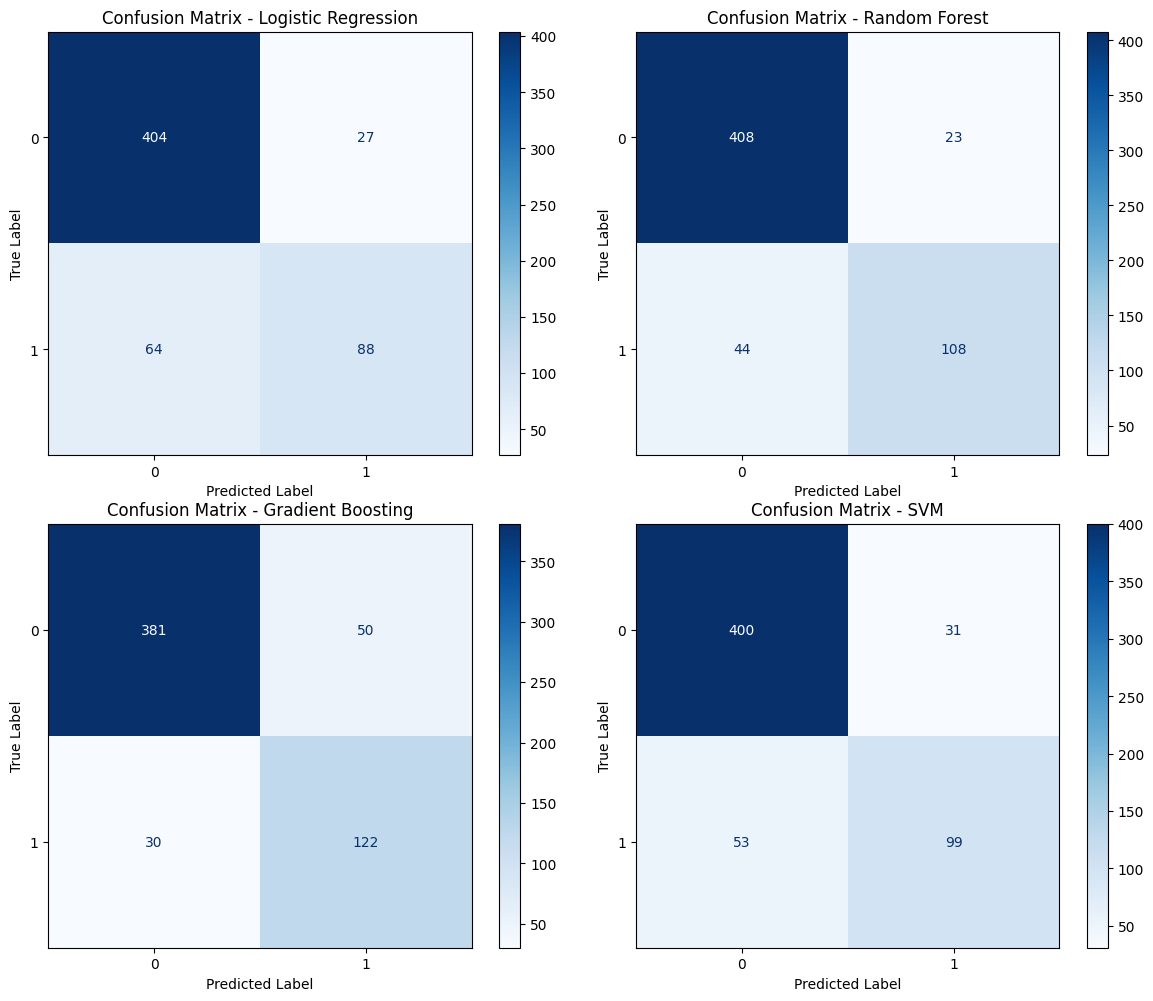

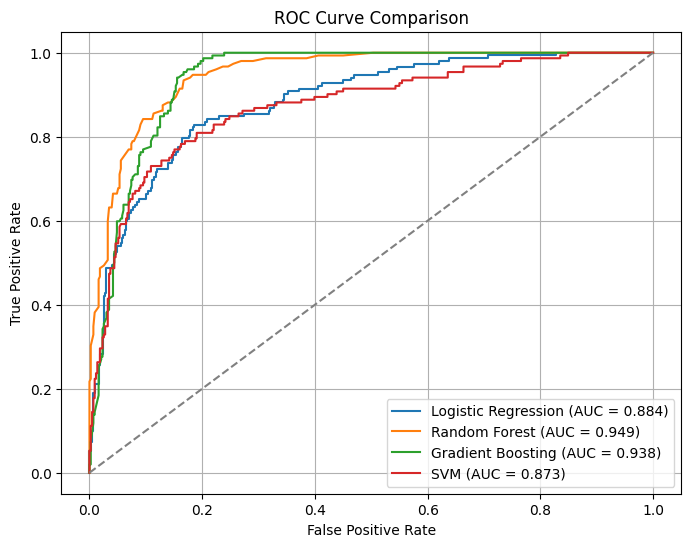

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier

### 1. Logistic regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_probs = lr_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

### 2. Random Forest Classifier
rf_model= RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


### 3. Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_model.fit(X_train, y_train)
y_pred_gbc = gbc_model.predict(X_test)
gbc_probs = gbc_model.predict_proba(X_test)[:, 1]

print("Gradient Boosting Report:")
print(classification_report(y_test, y_pred_gbc))

### 4. SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_probs = svm_model.predict_proba(X_test)[:, 1]

print("Support Vector Machines accuracy")
print(classification_report(y_test, y_pred_svm))





# Define model names for labels
model_names = ["Logistic Regression", "Random Forest", "Gradient Boosting", "SVM"]
predictions = [y_pred_lr, y_pred_rf, y_pred_gbc, y_pred_svm]
probabilities = [lr_probs, rf_probs, gbc_probs, svm_probs]

# Set up subplots for confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Flatten axes array to iterate easily

for i, (model_name, y_pred) in enumerate(zip(model_names, predictions)):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Confusion Matrix - {model_name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Step 3: Plot ROC Curves on the Same Graph
plt.figure(figsize=(8, 6))

for model_name, probs in zip(model_names, probabilities):
    auc = roc_auc_score(y_test, probs)
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

#### Feature Importance Analysis

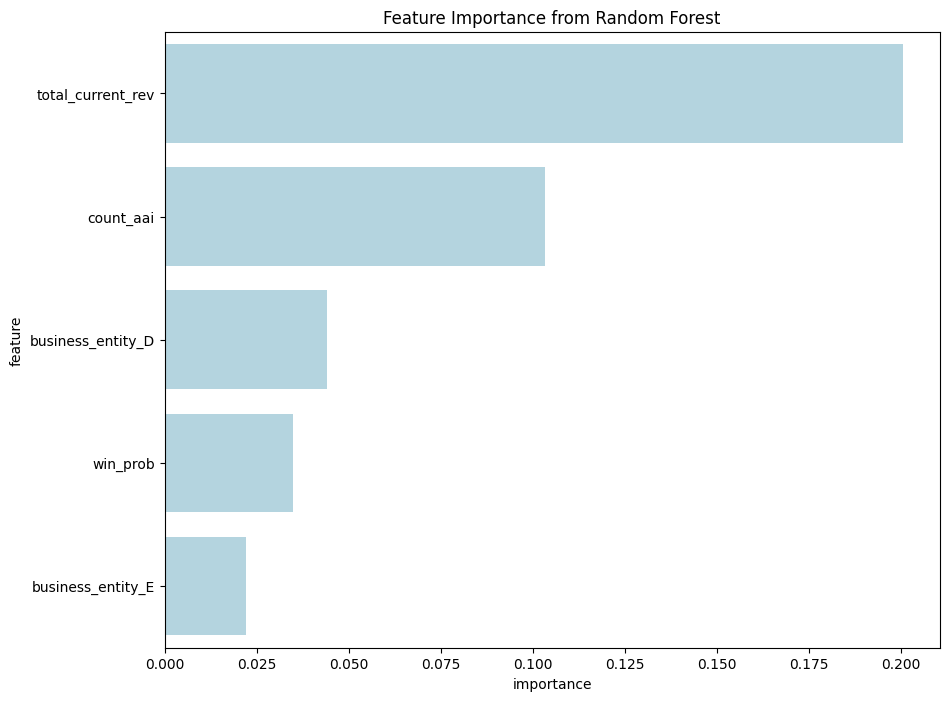

In [ ]:
importances_rf = rf_model.feature_importances_
feature_names = X.columns
feature_importance_rf = pd.DataFrame({'feature': feature_names,
                                      'importance': importances_rf})
feature_importance_rf = feature_importance_rf.sort_values('importance', ascending=False).head(5)

# Plot
plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='feature', data=feature_importance_rf, color = 'lightblue')
plt.title('Feature Importance from Random Forest')
plt.show()

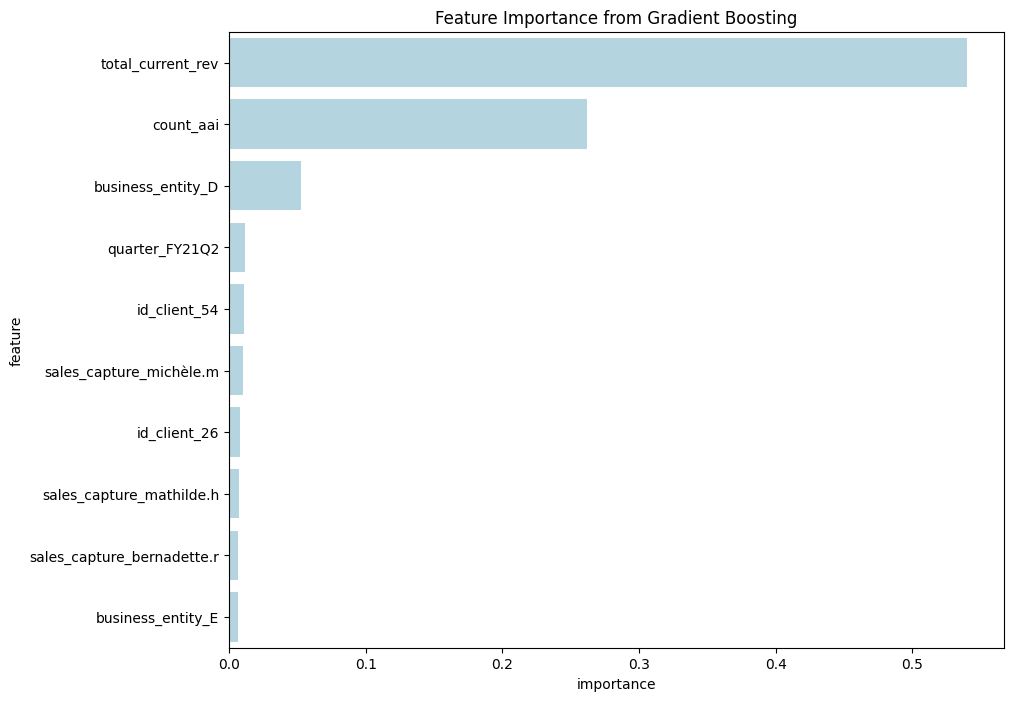

In [ ]:
importances_gbc= gbc_model.feature_importances_
feature_importance_gbc = pd.DataFrame({'feature': X.columns,
                                      'importance': importances_gbc})
feature_importance_gbc = feature_importance_gbc.sort_values('importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='feature', data=feature_importance_gbc, color = "lightblue")
plt.title('Feature Importance from Gradient Boosting')
plt.show()

### Opportunity Calssification


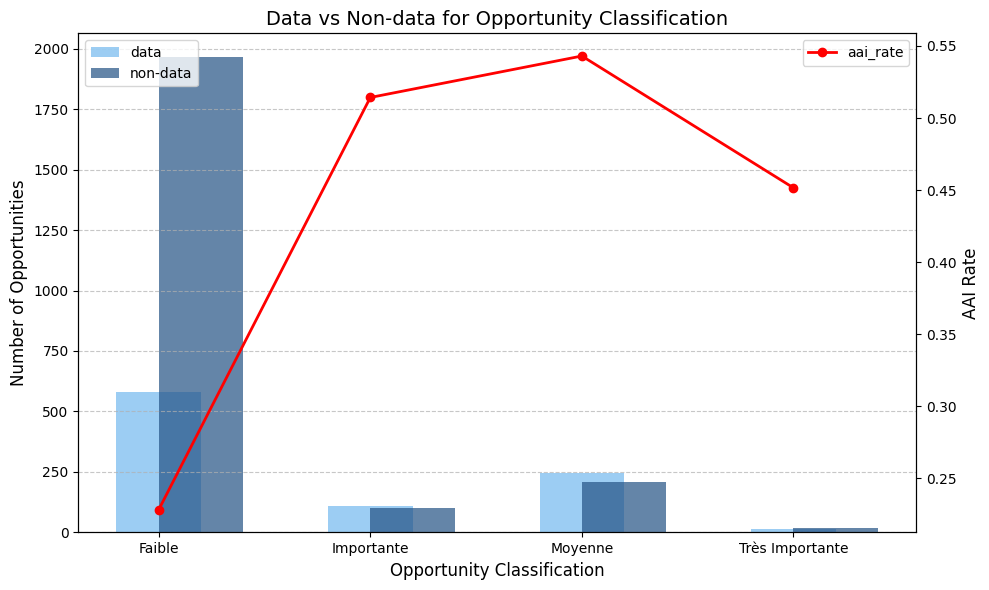

In [ ]:
df = df_base.copy()
# Count the number of aai_label for each Opportunity classification
grouped = df.groupby('opt_class')['aai_label'].value_counts().unstack(fill_value=0)

# Rename columns for clarity
grouped.columns = ['non-data', 'data']
grouped = grouped.reset_index()

# Calculate the aai_label rate
grouped['aai_rate'] = grouped['data'] / (grouped['data'] + grouped['non-data'])

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting aai_label as bar plots
ax1.bar(grouped['opt_class'], grouped['data'], label='data', alpha=0.7, color='#73B9EE', width=0.4, align='center')
ax1.bar(grouped['opt_class'], grouped['non-data'], label='non-data', alpha=0.7, color='#235284', width=0.4, align='edge')

# Setting up the first y-axis
ax1.set_ylabel('Number of Opportunities', fontsize=12)
ax1.set_xlabel('Opportunity Classification', fontsize=12)
ax1.set_title('Data vs Non-data for Opportunity Classification', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Creating a second y-axis for the label rate
ax2 = ax1.twinx()
ax2.plot(grouped['opt_class'], grouped['aai_rate'], label='aai_rate', color='red', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('AAI Rate', fontsize=12)
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

### Business entity


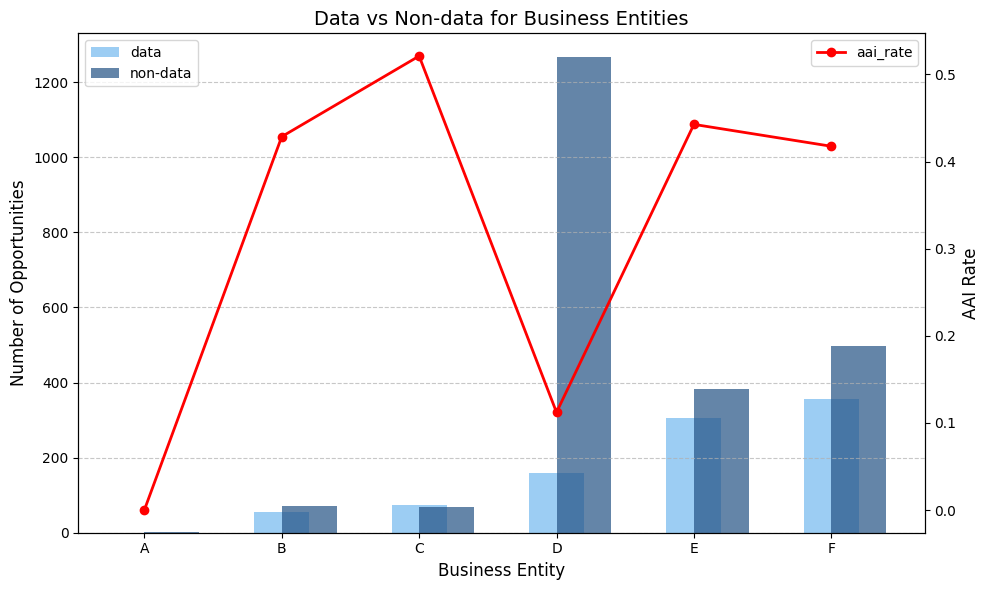

In [ ]:
# Count the number of aai_label for each Business entity
grouped = df.groupby('business_entity')['aai_label'].value_counts().unstack(fill_value=0)

# Rename columns for clarity
grouped.columns = ['non-data', 'data']
grouped = grouped.reset_index()

# Calculate the aai_label rate
grouped['aai_rate'] = grouped['data'] / (grouped['data'] + grouped['non-data'])

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting aai_label as bar plots
ax1.bar(grouped['business_entity'], grouped['data'], label='data', alpha=0.7, color='#73B9EE', width=0.4, align='center')
ax1.bar(grouped['business_entity'], grouped['non-data'], label='non-data', alpha=0.7, color='#235284', width=0.4, align='edge')

# Setting up the first y-axis
ax1.set_ylabel('Number of Opportunities', fontsize=12)
ax1.set_xlabel('Business Entity', fontsize=12)
ax1.set_title('Data vs Non-data for Business Entities', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Creating a second y-axis for the label rate
ax2 = ax1.twinx()
ax2.plot(grouped['business_entity'], grouped['aai_rate'], label='aai_rate', color='red', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('AAI Rate', fontsize=12)
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

### Top 10 SalesMan



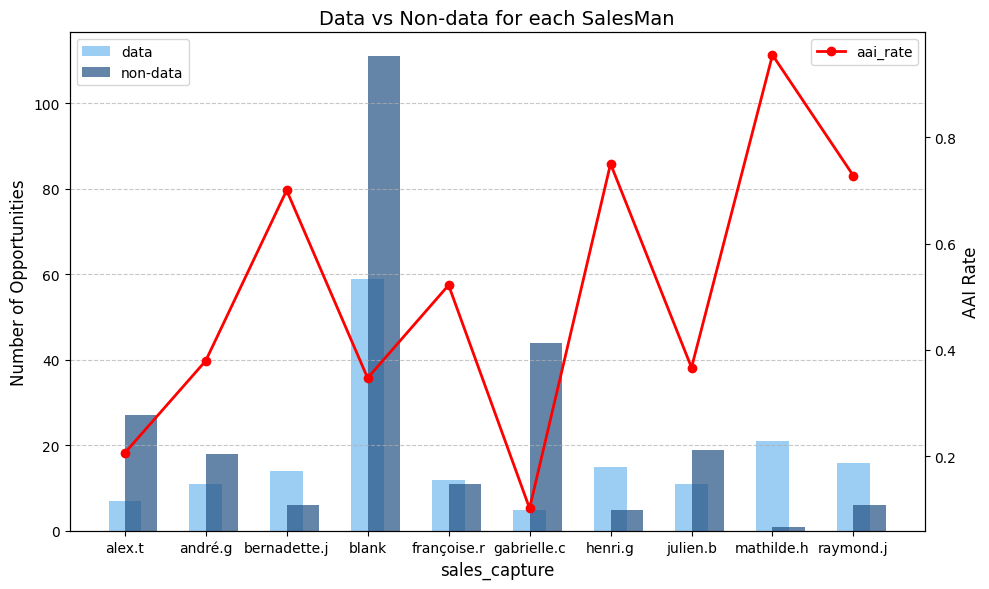

In [ ]:
# Filter for the top 10 Salesmen by the number of people
top_salesman = df.groupby('sales_capture')['count_aai'].sum().nlargest(10).index
filtered_df = df[df['sales_capture'].isin(top_salesman)]

# Count the number of data-related opportunities for each salesman
grouped = filtered_df.groupby('sales_capture')['aai_label'].value_counts().unstack(fill_value=0)

# Rename columns for clarity
grouped.columns = ['non-data', 'data']
grouped = grouped.reset_index()

# Calculate the aai_label rate
grouped['aai_rate'] = grouped['data'] / (grouped['data'] + grouped['non-data'])

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting target variable as bar plots
ax1.bar(grouped['sales_capture'], grouped['data'], label='data', alpha=0.7, color='#73B9EE', width=0.4, align='center')
ax1.bar(grouped['sales_capture'], grouped['non-data'], label='non-data', alpha=0.7, color='#235284', width=0.4, align='edge')

# Setting up the first y-axis
ax1.set_ylabel('Number of Opportunities', fontsize=12)
ax1.set_xlabel('sales_capture', fontsize=12)
ax1.set_title('Data vs Non-data for each SalesMan', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Creating a second y-axis for the aai_label
ax2 = ax1.twinx()
ax2.plot(grouped['sales_capture'], grouped['aai_rate'], label='aai_rate', color='red', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('AAI Rate', fontsize=12)
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

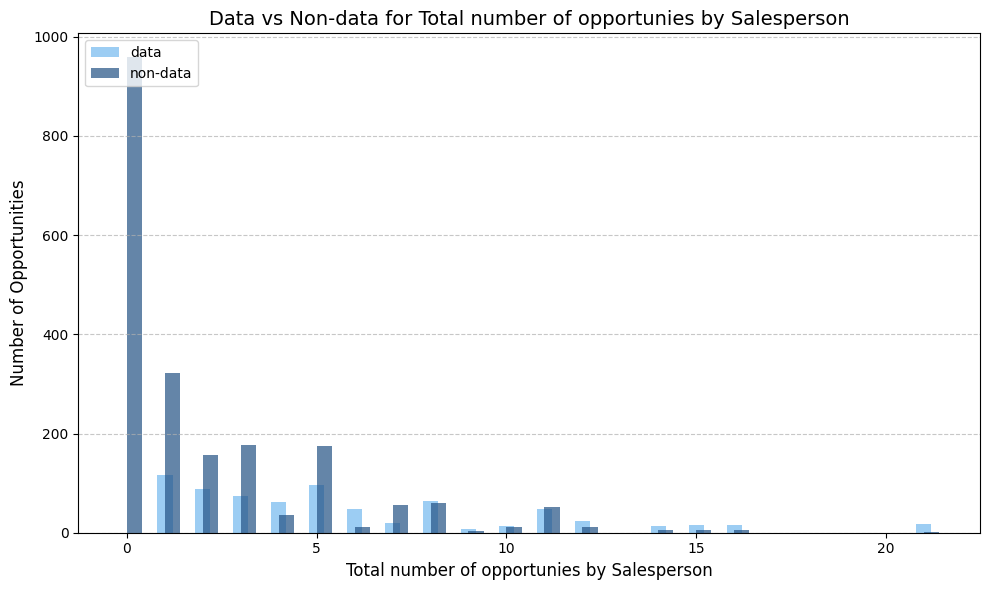

In [ ]:
df2 = df[(df['count_aai'] >= 0) & (df['count_aai'] <= 25)]
# Count the number of aai_label for each Business entity
grouped = df2.groupby('count_aai')['aai_label'].value_counts().unstack(fill_value=0)

# Rename columns for clarity
grouped.columns = ['non-data', 'data']
grouped = grouped.reset_index()



fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting aai_label as bar plots
ax1.bar(grouped['count_aai'], grouped['data'], label='data', alpha=0.7, color='#73B9EE', width=0.4, align='center')
ax1.bar(grouped['count_aai'], grouped['non-data'], label='non-data', alpha=0.7, color='#235284', width=0.4, align='edge')

# Setting up the first y-axis
ax1.set_ylabel('Number of Opportunities', fontsize=12)
ax1.set_xlabel('Total number of opportunies by Salesperson', fontsize=12)
ax1.set_title('Data vs Non-data for Total number of opportunies by Salesperson', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=0.7)



# Display the plot
plt.tight_layout()
plt.show()

### Total Current Revenu


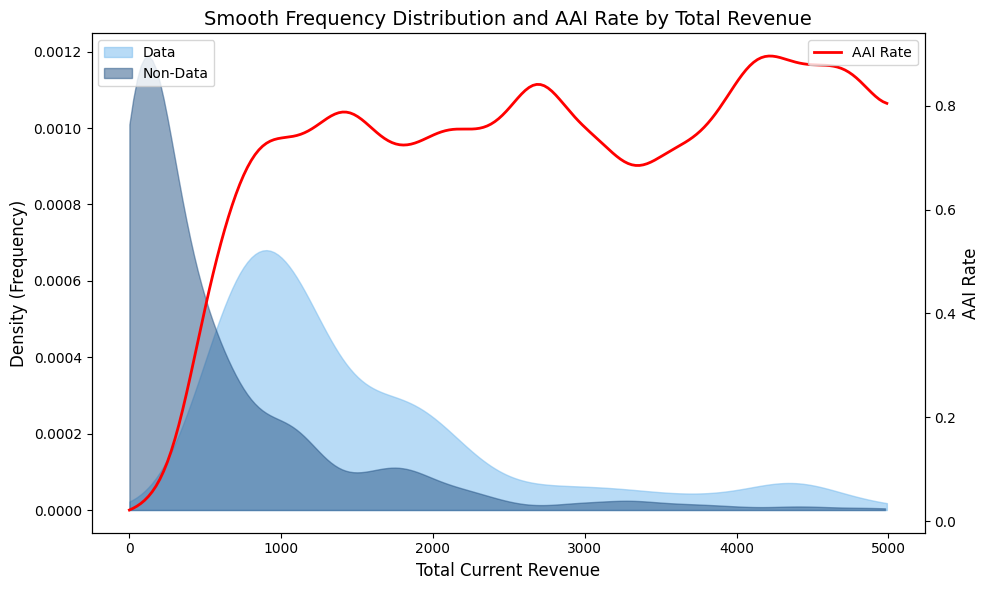

In [ ]:
from scipy.stats import gaussian_kde
df = df[(df['total_current_rev'] >= 0) & (df['total_current_rev'] <= 5000)] # Delete potential outliers


# Step 1: Filter data for 'data' and 'non-data'
data_revenue = df.loc[(df['aai_label'] == 1) & (df['total_current_rev'] >= 0), 'total_current_rev']
non_data_revenue = df.loc[(df['aai_label'] == 0) & (df['total_current_rev'] >= 0), 'total_current_rev']

# Step 2: Create KDE with bounds
def bounded_kde(data, lower=0):
    kde = gaussian_kde(data)
    x_values = np.linspace(lower, data.max(), 200)
    y_values = kde(x_values)
    y_values[x_values < lower] = 0  # Clip densities below 0
    return x_values, y_values

# Step 3: Set up the figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Smooth curves with bounds
x_data, y_data = bounded_kde(data_revenue, lower=0)
x_non_data, y_non_data = bounded_kde(non_data_revenue, lower=0)

ax1.fill_between(x_data, y_data, color='#73B9EE', alpha=0.5, label='Data')
ax1.fill_between(x_non_data, y_non_data, color='#235284', alpha=0.5, label='Non-Data')

# Step 4: Calculate smooth AAI rate
aai_rate_smooth = y_data / (y_data + y_non_data + 1e-10)  # Avoid division by zero

# Plot AAI Rate on the secondary axis
ax2 = ax1.twinx()
ax2.plot(x_data, aai_rate_smooth, color='red', linewidth=2, linestyle='-', label='AAI Rate')

# Step 5: Customize axes and titles
ax1.set_xlabel('Total Current Revenue', fontsize=12)
ax1.set_ylabel('Density (Frequency)', fontsize=12)
ax2.set_ylabel('AAI Rate', fontsize=12)
ax1.set_title('Smooth Frequency Distribution and AAI Rate by Total Revenue', fontsize=14)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


### Win Probability

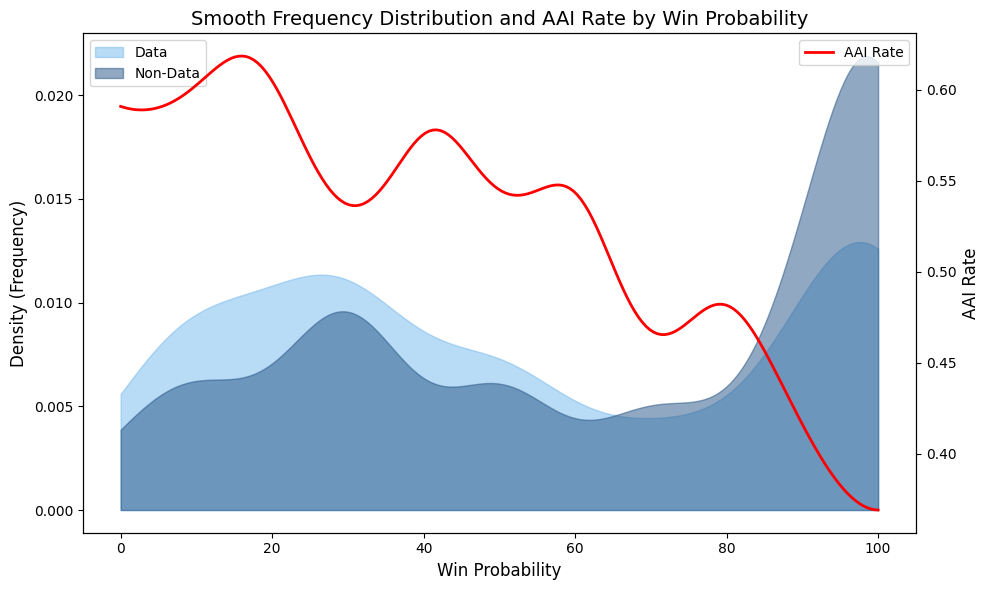

In [ ]:

# Step 1: Filter data for 'data' and 'non-data'
data_win_prob = df.loc[(df['aai_label'] == 1) & (df['win_prob'] >= 0), 'win_prob']
non_data_win_prob= df.loc[(df['aai_label'] == 0) & (df['win_prob'] >= 0), 'win_prob']

# Step 2: Create KDE with bounds
def bounded_kde(data, lower=0):
    kde = gaussian_kde(data)
    x_values = np.linspace(lower, data.max(), 200)
    y_values = kde(x_values)
    y_values[x_values < lower] = 0  # Clip densities below 0
    return x_values, y_values

# Step 3: Set up the figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Smooth curves with bounds
x_data, y_data = bounded_kde(data_win_prob, lower=0)
x_non_data, y_non_data = bounded_kde(non_data_win_prob, lower=0)

ax1.fill_between(x_data, y_data, color='#73B9EE', alpha=0.5, label='Data')
ax1.fill_between(x_non_data, y_non_data, color='#235284', alpha=0.5, label='Non-Data')

# Step 4: Calculate smooth AAI rate
aai_rate_smooth = y_data / (y_data + y_non_data + 1e-10)  # Avoid division by zero

# Plot AAI Rate on the secondary axis
ax2 = ax1.twinx()
ax2.plot(x_data, aai_rate_smooth, color='red', linewidth=2, linestyle='-', label='AAI Rate')

# Step 5: Customize axes and titles
ax1.set_xlabel('Win Probability', fontsize=12)
ax1.set_ylabel('Density (Frequency)', fontsize=12)
ax2.set_ylabel('AAI Rate', fontsize=12)
ax1.set_title('Smooth Frequency Distribution and AAI Rate by Win Probability', fontsize=14)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


### Probabilities Assessment  - Potential Mistakes

In [ ]:
rf_model= RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_probs = rf_model.predict_proba(X_test)[:, 1]

df= df_base.copy()
df['total_current_rev'].describe()
df = df[(df['total_current_rev'] >= 0) & (df['total_current_rev'] <= 5000)] # Delete potential outliers
df.drop(columns=['opt_name_data', 'opt_desc_data', 'opt_name_size', 'opt_desc_size' ], inplace=True)


rf_probs_df = pd.DataFrame(rf_probs, columns=['rf_probability'])
# Concatenate the new column with the original X_test DataFrame
X = df.drop(['aai_label', 'opt_ID'], axis=1)
y = df['aai_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_with_probs = pd.concat([X_test, rf_probs_df], axis=1)

# Create a mask where predicted probability of being data driven is > 0.4 and true target aai_label is 0
mask = (rf_probs > 0.4) & (y_test == 0)

# Filter the dataset (X_test and y_test) based on the mask
filtered_X = X_test[mask]
filtered_y = y_test[mask]

# Combine the features and target into a single dataframe (optional)
potential_mistakes = pd.DataFrame(filtered_X)
potential_mistakes['True_Label'] = filtered_y
potential_mistakes['Predicted_Probabilities'] = rf_probs[mask]

# Display the filtered dataset



In [ ]:
potential_mistakes.head(10)
columns_to_display = pd.concat([filtered_df.iloc[:, :7], filtered_df.iloc[:, -5:]], axis=1)
columns_to_display.head(10)

,opt_ID,opt_name_data,opt_desc_data,opt_name_size,opt_desc_size,client_class,id_client,mergers,stage,win_prob,total_current_rev,aai_label
23,10887251,NaN,NaN,3,5,Très haute,0,other,0A,100,870,0
24,11049070,NaN,NaN,6,6,Très haute,0,other,0A,30,90,0
25,11049075,NaN,NaN,6,6,Très haute,0,other,0A,30,90,0
96,11058711,NaN,analyti,1,36,Moyenne,Restricted,non_data_acq,1,50,814,1
145,11110224,NaN,NaN,3,12,Très haute,2,other,0A,0,516,0
146,11110217,NaN,NaN,5,12,Très haute,2,other,0A,0,230,0
147,11124763,NaN,NaN,2,12,Très haute,2,other,0A,0,176,0
148,11078829,NaN,Data,5,9,Très haute,2,other,0A,0,0,0
149,10988792,Data,NaN,5,1,Très haute,2,other,0A,0,2784,1
154,11086666,NaN,NaN,2,40,Très haute,2,data_acq,1,20,1850,0


In [ ]:
potential_mistakes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 206 to 1830
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   client_class             34 non-null     object 
 1   id_client                34 non-null     object 
 2   segment                  34 non-null     object 
 3   duration                 34 non-null     object 
 4   opt_class                34 non-null     object 
 5   sales_capture            34 non-null     object 
 6   count_aai                34 non-null     int64  
 7   pricing_struct           34 non-null     object 
 8   business_entity          34 non-null     object 
 9   client_location          34 non-null     object 
 10  competition_type         34 non-null     object 
 11  alliances                34 non-null     object 
 12  quarter                  34 non-null     object 
 13  mergers                  34 non-null     object 
 14  stage                    34 n